In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")

awards = pd.read_csv("data/awards_data.csv")
player_data = pd.read_csv("data/player_stats.csv")
team_data = pd.read_csv("data/team_stats.csv")
rebounding_data = pd.read_csv("data/team_rebounding_data_22.csv")

# DBSCAN

## player_data

In [2]:
player_data_clean = player_data.drop(columns=['draftpick'])
columns_to_replace_zeros = ['fgp', 'fgp3', 'fgp2', 'efg', 'ftp', 'FTr','tov_pct']
player_data_clean[columns_to_replace_zeros] = player_data_clean[columns_to_replace_zeros].replace(np.nan,0)

In [3]:
duplicated_rows = player_data_clean[player_data_clean.duplicated()]

In [4]:
# Convert all names to lower case and all team name to upper case
player_data_clean['player'] = player_data_clean['player'].str.lower()
player_data_clean['team'] = player_data_clean['team'].str.upper()
# convert some features name to a more readable form
player_data_clean = player_data_clean.rename(columns={'nbapersonid': 'personID'})
player_data_clean = player_data_clean.rename(columns={'player': 'name'})
player_data_clean = player_data_clean.rename(columns={'nbateamid': 'teamID'})
player_data_clean = player_data_clean.rename(columns={'games': 'game_played'})
player_data_clean = player_data_clean.rename(columns={'games_start': 'games_as_the_start'})# the number of games that the player played as the starting team

In [5]:
player_data_clean.select_dtypes(include=['float64', 'int64'])

,personID,draftyear,season,teamID,game_played,games_as_the_start,mins,fgm,fga,fgp,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
0,2585,2003,2007,1610612737,62,5,944,107,245,0.437,...,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7
1,200780,2006,2007,1610612737,35,0,145,12,30,0.400,...,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2
2,2746,2004,2007,1610612737,81,81,2873,518,1133,0.457,...,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7
3,201151,2007,2007,1610612737,56,6,865,95,237,0.401,...,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7
4,101136,2005,2007,1610612737,35,0,402,65,180,0.361,...,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8487,1630648,2021,2021,1610612764,4,0,30,1,11,0.091,...,0.000,0.078,0.191,-0.2,0.0,-0.1,-8.6,-4.4,-13.0,-0.1
8488,1630557,2021,2021,1610612764,77,36,1801,234,514,0.455,...,0.010,0.085,0.146,1.6,0.7,2.3,-0.8,-1.5,-2.3,-0.1
8489,1628398,2017,2021,1610612764,66,66,2204,423,936,0.452,...,0.022,0.141,0.242,0.0,2.0,2.0,0.2,-0.4,-0.2,1.0
8490,203526,2013,2021,1610612764,70,19,1372,204,441,0.463,...,0.002,0.139,0.184,0.7,0.8,1.5,-2.5,-0.5,-3.0,-0.4


In [6]:
player_num_cols = player_data_clean.select_dtypes(include=['float64', 'int64'])
columns_to_exclude = ['personID', 'teamID']
player_num_cols = player_num_cols.drop(columns=columns_to_exclude,axis=1)

### PCA

We will standard scale the dataset before performing PCA.

In [7]:
columns_name = player_num_cols.columns
player_stats_numerical = player_data_clean[columns_name]
scaler = StandardScaler()
player_stats_scaled = scaler.fit_transform(player_stats_numerical)

pca = PCA(0.90)
principalComponents = pca.fit_transform(player_stats_scaled)
principalDf_player_stats = pd.DataFrame(data=principalComponents)
principalDf_player_stats

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.672355,1.919143,-2.172668,1.424548,-0.386250,-1.557440,-0.558001,0.518493,1.034742,0.872393,1.069285,-0.529165,0.279714
1,-4.292558,2.124693,-2.210512,1.277179,0.365587,-1.262501,-0.627751,0.942020,1.330222,-0.810328,1.087748,0.047708,0.536663
2,11.469243,2.866020,-3.489239,1.637805,-1.378579,1.581172,-0.073694,-1.385878,-0.301188,1.477814,-1.915162,2.572689,0.607497
3,-2.262614,-1.932332,-0.416146,1.566222,-1.293985,-0.822306,-0.996373,-0.207297,-0.325131,1.086575,0.234059,-0.201864,0.357266
4,-2.851517,-1.981929,0.261198,1.003812,0.113531,-2.223598,0.742815,-0.588422,0.198728,0.607998,-0.377405,0.850592,-0.145895
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8487,-5.828016,-1.737403,-3.999775,-1.759689,2.447899,1.268447,2.041803,0.527670,1.663948,1.303574,-0.465467,-0.872565,-1.085719
8488,1.032472,-1.426816,1.148010,-3.718856,-0.734350,-0.134141,-0.462944,-0.064779,0.352600,-0.164082,0.746261,-0.154568,0.462648
8489,5.681881,-0.301534,-0.688965,-2.686777,0.922506,0.857799,-0.605150,1.617015,-0.011441,0.691372,-0.665803,0.662955,0.431948
8490,0.500829,-1.938444,0.837841,-0.674588,-0.061465,0.701417,-1.519396,-0.265478,-0.254493,1.013691,0.407525,-0.625881,0.413543


We will then take a look at the explained variance to see how much variance each principal component captures. Then we will choose accordingly in the part where we perform unsupervised learning.

In [8]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

Explained Variance: [0.43567864 0.11724928 0.08259299 0.04416969 0.04096196 0.03655665
 0.03068917 0.02260607 0.02222157 0.02146992 0.0191298  0.01747699
 0.0155553 ]


We will run DBSCAN on the PCA dataset using the first 2 PCs.

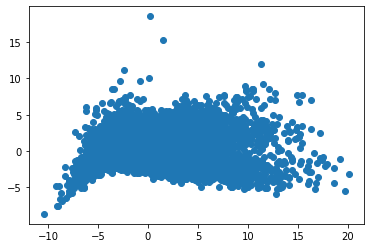

In [9]:
# Plot the data
plt1 = plt.scatter(principalDf_player_stats[0], principalDf_player_stats[1])

Estimated number of clusters: 24
Estimated number of noise points: 37


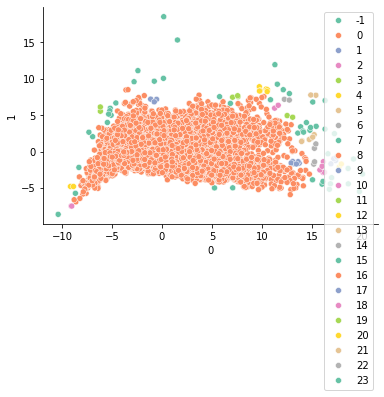

In [63]:
# Run DBSCAN
principalDF_dbscan = principalDf_player_stats[[0, 1]]
db = DBSCAN(eps = 0.7, min_samples = 2).fit(principalDF_dbscan)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

sns.scatterplot(data = principalDF_dbscan, x = principalDF_dbscan[0], y = principalDF_dbscan[1], 
                hue = labels, 
                palette = sns.color_palette("Set2",n_clusters_));
sns.despine()

## awards data

In [11]:
awards_clean = awards.dropna(subset=['nbapersonid'])

In [12]:
duplicated_rows = awards_clean[awards_clean.duplicated()]

In [13]:
award_columns = ['All NBA Defensive First Team', 'All NBA Defensive Second Team', 
                 'All NBA First Team', 'All NBA Second Team', 'All NBA Third Team', 
                 'All Rookie First Team', 'All Rookie Second Team', 
                 'Bill Russell NBA Finals MVP', 'Player Of The Month', 
                 'Player Of The Week', 'Rookie Of The Month', 'all_star_game', 
                 'rookie_all_star_game', 'allstar_rk', 'Defensive Player Of The Year_rk', 
                 'Most Improved Player_rk', 'Most Valuable Player_rk', 
                 'Rookie Of The Year_rk', 'Sixth Man Of The Year_rk', 
                 'all_nba_points_rk', 'all_rookie_points_rk']

for col in award_columns:
    awards_clean[col].fillna(0, inplace=True)

In [14]:
awards_clean['all_star_game'] = awards_clean['all_star_game'].map({False: 0, True: 1}).astype(float)
awards_clean['rookie_all_star_game'] = awards_clean['rookie_all_star_game'].map({False: 0, True: 1}).astype(float)

In [15]:
awards_clean = awards_clean.rename(columns={'nbapersonid': 'personID'})
awards_clean = awards_clean.rename(columns={'all_star_game': 'all_star?'})
awards_clean = awards_clean.rename(columns={'rookie_all_star_game': 'rookie_all_star?'})

In [16]:
awards_num_cols = awards_clean.select_dtypes(include=['float64', 'int64'])
columns_to_exclude = ['personID']
awards_num_cols = awards_num_cols.drop(columns=columns_to_exclude)

### PCA

We will standard scale the dataset before performing PCA.

In [17]:
columns_name = awards_num_cols.columns
award_stats_numerical = awards_clean[columns_name]
scaler = StandardScaler()
award_stats_scaled = scaler.fit_transform(award_stats_numerical)

pca = PCA(0.90)
principalComponents = pca.fit_transform(award_stats_scaled)
principalDf_award_stats = pd.DataFrame(data=principalComponents)
principalDf_award_stats

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,8.440156,-0.669155,3.612062,-3.248069,0.819703,0.952777,-1.704937,1.242831,3.426065,-0.719963,-1.165370,-2.536059,1.858326,-0.930870,-2.257085,2.348368
1,3.725572,0.186682,-0.135589,-0.536459,-0.061814,-1.292529,-0.625170,-0.171352,-0.617007,0.364925,-0.018771,-0.543790,-2.115175,0.741017,-0.832511,1.059841
2,2.020551,0.310169,-0.191438,-2.272501,0.669117,1.737142,-0.594812,1.704128,5.360431,-0.867702,-0.263381,-1.300444,1.862584,-0.612081,-2.232200,2.077934
3,4.865675,0.071907,-2.306860,3.993086,-2.166265,-3.942747,4.563203,-0.361804,1.962666,-0.448569,-1.307465,-1.254408,-0.470217,0.043521,-0.803846,0.910981
4,10.786995,-1.087195,5.856774,-5.102361,1.390756,1.722062,-1.680529,0.510756,2.154512,-0.513598,-1.380130,-3.311915,0.262411,-0.453184,-0.752592,0.636620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,-0.435861,1.302131,-0.110394,-1.199087,-2.823010,0.092080,-0.096863,0.106086,0.789162,5.713875,-1.254510,0.057324,0.849346,0.701226,0.152194,-0.289529
4317,-0.435861,1.302131,-0.110394,-1.199087,-2.823010,0.092080,-0.096863,0.106086,0.789162,5.713875,-1.254510,0.057324,0.849346,0.701226,0.152194,-0.289529
4318,-0.435861,1.302131,-0.110394,-1.199087,-2.823010,0.092080,-0.096863,0.106086,0.789162,5.713875,-1.254510,0.057324,0.849346,0.701226,0.152194,-0.289529
4319,-0.542294,0.792256,0.061013,-0.769142,-2.117118,0.091081,-0.112822,0.061490,0.558826,4.321301,-0.847800,0.015060,0.741841,0.416823,0.141861,-0.299995


We will then take a look at the explained variance to see how much variance each principal component captures. Then we will choose accordingly in the part where we perform unsupervised learning.

In [18]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

Explained Variance: [0.17697493 0.11597585 0.0781489  0.06498761 0.05930037 0.05408957
 0.04828576 0.04410959 0.04180999 0.04050191 0.03932972 0.03875374
 0.03032152 0.02942342 0.02439936 0.02431878]


We will run DBSCAN on the PCA dataset using the first 2 PCs.

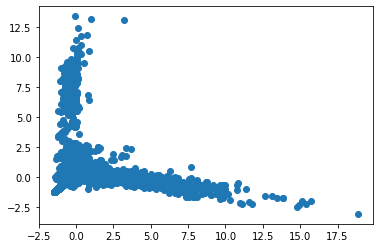

In [65]:
# Plot the data
plt1 = plt.scatter(principalDf_award_stats[0], principalDf_award_stats[1])

Estimated number of clusters: 9
Estimated number of noise points: 10


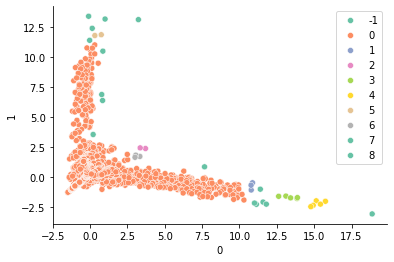

In [68]:
# Run DBSCAN
principalDF_dbscan = principalDf_award_stats[[0, 1]]
db = DBSCAN(eps = 0.5, min_samples = 2).fit(principalDF_dbscan)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

sns.scatterplot(data = principalDF_dbscan, x = principalDF_dbscan[0], y = principalDF_dbscan[1], 
                hue = labels, 
                palette = sns.color_palette("Set2",n_clusters_));
sns.despine()

## team_data

In [19]:
team_data_clean = team_data
team_data_clean['win_percentage'] = team_data_clean['W'] /team_data_clean['games'] 
team_data_clean['lose_percentage'] = team_data_clean['L'] /team_data_clean['games'] 
team_data_clean['win_percentage'] = team_data_clean['win_percentage'].round(2)
team_data_clean['lose_percentage'] = team_data_clean['lose_percentage'].round(2)

In [20]:
team_data_clean = team_data_clean.rename(columns={'nbateamid': 'teamID'})
team_data_clean = team_data_clean.rename(columns={'team': 'team_name'})
team_data_clean = team_data_clean.rename(columns={'games': 'total_game'})
team_data_clean = team_data_clean.rename(columns={'off_rtg': 'offensive_rate'})
team_data_clean = team_data_clean.rename(columns={'def_rtg': 'defensive_rate'})
team_data_clean = team_data_clean.rename(columns={'net_rtg	': 'net_rate'})

In [21]:
team_num_cols = team_data_clean.select_dtypes(include=['float64', 'int64'])
columns_to_exclude = ['teamID']
team_num_cols = team_num_cols.drop(columns=columns_to_exclude,axis=1)

### PCA

In [22]:
columns_name = team_num_cols.columns
team_stats_numerical = team_data_clean[columns_name]
scaler = StandardScaler()
team_stats_scaled = scaler.fit_transform(team_stats_numerical)

pca = PCA(0.90)
principalComponents = pca.fit_transform(team_stats_scaled)
principalDf_team_stats = pd.DataFrame(data=principalComponents)
principalDf_team_stats

,0,1,2
0,0.832151,-1.244492,-0.412609
1,1.771354,-1.524464,-0.286465
2,-5.007585,-2.248026,0.181053
3,1.918419,-1.452639,-0.327394
4,1.571532,-1.846663,-0.129204
...,...,...,...
445,2.239619,2.127520,-1.154642
446,0.915859,2.007490,-1.079937
447,-1.332936,1.817541,-0.940513
448,-2.040838,2.276042,-1.161007


In [23]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

Explained Variance: [0.62977278 0.19123763 0.11746024]


We will now run DBSCAN on the PCA dataset using the first 2 PCs.

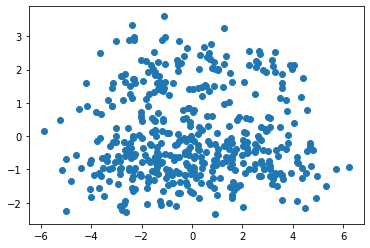

In [70]:
# Plot the data
plt1 = plt.scatter(principalDf_team_stats[0], principalDf_team_stats[1])

Estimated number of clusters: 25
Estimated number of noise points: 40


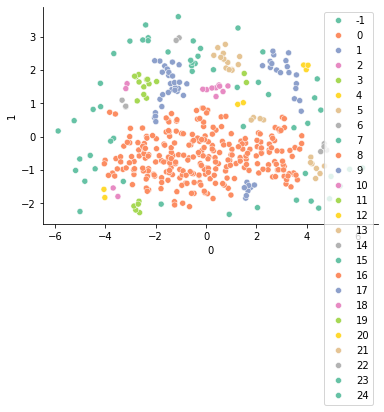

In [75]:
# Run DBSCAN
principalDF_dbscan = principalDf_team_stats[[0, 1]]
db = DBSCAN(eps = 0.35, min_samples = 2).fit(principalDF_dbscan)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

sns.scatterplot(data = principalDF_dbscan, x = principalDF_dbscan[0], y = principalDF_dbscan[1], 
                hue = labels, 
                palette = sns.color_palette("Set2",n_clusters_));
sns.despine()

## rebounding data

In [24]:
rebounding_data_clean = rebounding_data
rebounding_data_clean = rebounding_data.rename(columns={'opp_team': 'opposite_team_name'})
rebounding_data_clean = rebounding_data.rename(columns={'team': 'team_name'})
rebounding_data_clean = rebounding_data.rename(columns={'oreb_pct': 'Offensive_rebound_perc'})

In [25]:
rebounding_num_cols = rebounding_data_clean.select_dtypes(include=['float64', 'int64'])

### PCA

In [26]:
columns_name = rebounding_num_cols.columns
rebound_stats_numerical = rebounding_data_clean[columns_name]
scaler = StandardScaler()
rebound_stats_scaled = scaler.fit_transform(rebound_stats_numerical)

pca = PCA(0.90)
principalComponents = pca.fit_transform(rebound_stats_scaled)
principalDf_rebounding_stats = pd.DataFrame(data=principalComponents)
principalDf_rebounding_stats

,0,1,2
0,1.281017,-1.671620,-1.073836
1,1.877043,-1.783874,-0.200848
2,-0.953302,-1.747302,0.694664
3,-0.397016,-1.800918,0.993653
4,0.167926,-1.692398,-0.364150
...,...,...,...
2455,-1.337672,1.723124,0.573688
2456,0.381765,1.572668,1.341135
2457,0.419835,1.474415,2.329161
2458,0.544042,1.637624,0.605767


In [27]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

Explained Variance: [0.56352898 0.25003522 0.18440364]


We will now run DBSCAN on the PCA dataset using the first 2 PCs.

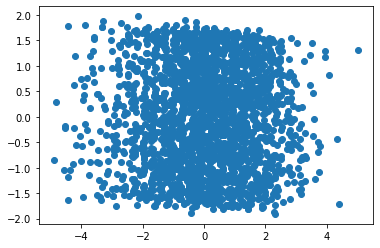

In [76]:
# Plot the data
plt1 = plt.scatter(principalDf_rebounding_stats[0], principalDf_rebounding_stats[1])

Estimated number of clusters: 21
Estimated number of noise points: 43


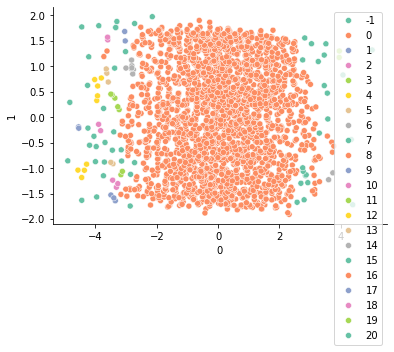

In [82]:
# Run DBSCAN
principalDF_dbscan = principalDf_rebounding_stats[[0, 1]]
db = DBSCAN(eps = 0.2, min_samples = 2).fit(principalDF_dbscan)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

sns.scatterplot(data = principalDF_dbscan, x = principalDF_dbscan[0], y = principalDF_dbscan[1], 
                hue = labels, 
                palette = sns.color_palette("Set2",n_clusters_));
sns.despine()